## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.982806  0.594908 -1.589154  1.408827 -1.043512  0.871123
1  0.738442  0.530283 -1.082097  0.115475 -0.555227  0.970853
2  0.193433  1.344602 -1.097869  1.520971 -1.437931  1.615586
3 -0.322573 -0.118223  0.233781  0.861773  1.018801  0.588437
4 -0.230465 -0.751462  0.892477 -1.298427 -1.578629 -1.609288


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9662670	total: 58ms	remaining: 58s
1:	learn: 0.9573326	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9489148	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9412242	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9343153	total: 60ms	remaining: 11.9s
5:	learn: 0.9269929	total: 60.6ms	remaining: 10s
6:	learn: 0.9170704	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9092835	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9022794	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8937867	total: 62.7ms	remaining: 6.21s
10:	learn: 0.8855758	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8762379	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8668560	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8590239	total: 64.7ms	remaining: 4.55s
14:	learn: 0.8517832	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8429799	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8347601	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8280359	total: 66.5ms	remaining: 3.63s
18:	learn: 0.8214358	total: 67ms	remaining: 3.46s
19

104:	learn: 0.4097429	total: 107ms	remaining: 912ms
105:	learn: 0.4065948	total: 108ms	remaining: 908ms
106:	learn: 0.4027992	total: 108ms	remaining: 902ms
107:	learn: 0.4000653	total: 109ms	remaining: 896ms
108:	learn: 0.3968791	total: 109ms	remaining: 891ms
109:	learn: 0.3936279	total: 110ms	remaining: 886ms
110:	learn: 0.3909083	total: 110ms	remaining: 882ms
111:	learn: 0.3879056	total: 111ms	remaining: 877ms
112:	learn: 0.3849783	total: 111ms	remaining: 873ms
113:	learn: 0.3827043	total: 112ms	remaining: 869ms
114:	learn: 0.3794210	total: 112ms	remaining: 865ms
115:	learn: 0.3760651	total: 113ms	remaining: 861ms
116:	learn: 0.3733294	total: 114ms	remaining: 857ms
117:	learn: 0.3709523	total: 114ms	remaining: 853ms
118:	learn: 0.3687257	total: 115ms	remaining: 850ms
119:	learn: 0.3660970	total: 115ms	remaining: 845ms
120:	learn: 0.3633729	total: 116ms	remaining: 841ms
121:	learn: 0.3607741	total: 116ms	remaining: 837ms
122:	learn: 0.3581237	total: 117ms	remaining: 832ms
123:	learn: 

272:	learn: 0.1185545	total: 186ms	remaining: 496ms
273:	learn: 0.1177132	total: 187ms	remaining: 495ms
274:	learn: 0.1169512	total: 187ms	remaining: 494ms
275:	learn: 0.1161608	total: 188ms	remaining: 493ms
276:	learn: 0.1155216	total: 188ms	remaining: 492ms
277:	learn: 0.1147416	total: 189ms	remaining: 490ms
278:	learn: 0.1140029	total: 189ms	remaining: 489ms
279:	learn: 0.1132925	total: 190ms	remaining: 488ms
280:	learn: 0.1125327	total: 190ms	remaining: 486ms
281:	learn: 0.1118268	total: 190ms	remaining: 485ms
282:	learn: 0.1110922	total: 191ms	remaining: 484ms
283:	learn: 0.1103607	total: 191ms	remaining: 482ms
284:	learn: 0.1094016	total: 192ms	remaining: 481ms
285:	learn: 0.1086536	total: 192ms	remaining: 479ms
286:	learn: 0.1079862	total: 192ms	remaining: 478ms
287:	learn: 0.1072642	total: 193ms	remaining: 477ms
288:	learn: 0.1065920	total: 193ms	remaining: 476ms
289:	learn: 0.1059302	total: 194ms	remaining: 474ms
290:	learn: 0.1051857	total: 194ms	remaining: 473ms
291:	learn: 

489:	learn: 0.0355306	total: 289ms	remaining: 301ms
490:	learn: 0.0354189	total: 290ms	remaining: 301ms
491:	learn: 0.0353110	total: 290ms	remaining: 300ms
492:	learn: 0.0352259	total: 291ms	remaining: 299ms
493:	learn: 0.0350286	total: 291ms	remaining: 299ms
494:	learn: 0.0348396	total: 292ms	remaining: 298ms
495:	learn: 0.0346555	total: 292ms	remaining: 297ms
496:	learn: 0.0345734	total: 293ms	remaining: 296ms
497:	learn: 0.0343897	total: 293ms	remaining: 296ms
498:	learn: 0.0342380	total: 294ms	remaining: 295ms
499:	learn: 0.0340905	total: 294ms	remaining: 294ms
500:	learn: 0.0339316	total: 295ms	remaining: 293ms
501:	learn: 0.0338070	total: 295ms	remaining: 293ms
502:	learn: 0.0336987	total: 295ms	remaining: 292ms
503:	learn: 0.0335242	total: 296ms	remaining: 291ms
504:	learn: 0.0333532	total: 296ms	remaining: 290ms
505:	learn: 0.0331857	total: 297ms	remaining: 290ms
506:	learn: 0.0330216	total: 297ms	remaining: 289ms
507:	learn: 0.0328608	total: 298ms	remaining: 289ms
508:	learn: 

650:	learn: 0.0172155	total: 369ms	remaining: 198ms
651:	learn: 0.0171445	total: 370ms	remaining: 197ms
652:	learn: 0.0170200	total: 370ms	remaining: 197ms
653:	learn: 0.0169179	total: 371ms	remaining: 196ms
654:	learn: 0.0168342	total: 371ms	remaining: 195ms
655:	learn: 0.0167468	total: 371ms	remaining: 195ms
656:	learn: 0.0166816	total: 372ms	remaining: 194ms
657:	learn: 0.0166177	total: 372ms	remaining: 193ms
658:	learn: 0.0165550	total: 373ms	remaining: 193ms
659:	learn: 0.0164793	total: 373ms	remaining: 192ms
660:	learn: 0.0164078	total: 374ms	remaining: 192ms
661:	learn: 0.0163440	total: 374ms	remaining: 191ms
662:	learn: 0.0162589	total: 374ms	remaining: 190ms
663:	learn: 0.0162130	total: 375ms	remaining: 190ms
664:	learn: 0.0161465	total: 375ms	remaining: 189ms
665:	learn: 0.0160653	total: 376ms	remaining: 188ms
666:	learn: 0.0159974	total: 376ms	remaining: 188ms
667:	learn: 0.0159368	total: 376ms	remaining: 187ms
668:	learn: 0.0158829	total: 377ms	remaining: 186ms
669:	learn: 

869:	learn: 0.0068241	total: 473ms	remaining: 70.7ms
870:	learn: 0.0067880	total: 474ms	remaining: 70.2ms
871:	learn: 0.0067769	total: 474ms	remaining: 69.7ms
872:	learn: 0.0067510	total: 475ms	remaining: 69.1ms
873:	learn: 0.0067157	total: 475ms	remaining: 68.5ms
874:	learn: 0.0066904	total: 476ms	remaining: 68ms
875:	learn: 0.0066558	total: 476ms	remaining: 67.4ms
876:	learn: 0.0066225	total: 477ms	remaining: 66.9ms
877:	learn: 0.0066118	total: 477ms	remaining: 66.3ms
878:	learn: 0.0065834	total: 478ms	remaining: 65.8ms
879:	learn: 0.0065559	total: 478ms	remaining: 65.2ms
880:	learn: 0.0065227	total: 478ms	remaining: 64.6ms
881:	learn: 0.0065030	total: 479ms	remaining: 64.1ms
882:	learn: 0.0064820	total: 479ms	remaining: 63.5ms
883:	learn: 0.0064628	total: 480ms	remaining: 62.9ms
884:	learn: 0.0064423	total: 480ms	remaining: 62.4ms
885:	learn: 0.0064235	total: 480ms	remaining: 61.8ms
886:	learn: 0.0064033	total: 481ms	remaining: 61.2ms
887:	learn: 0.0063850	total: 481ms	remaining: 60

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

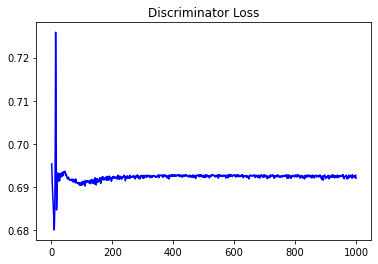

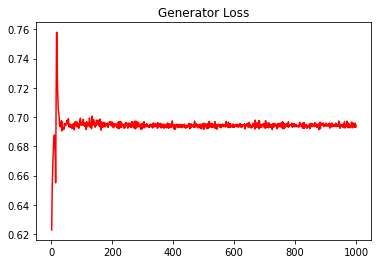

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.048706022565512604


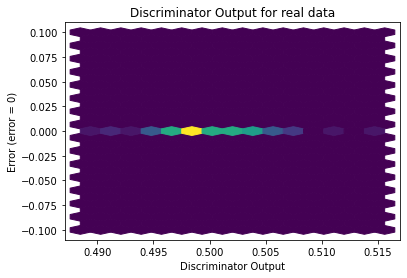

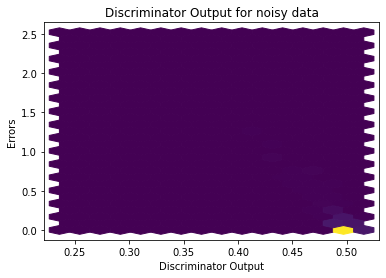

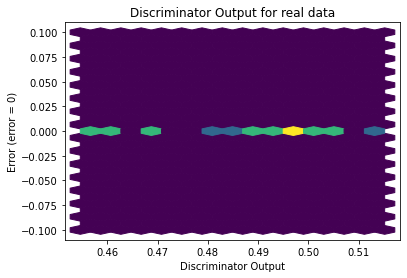

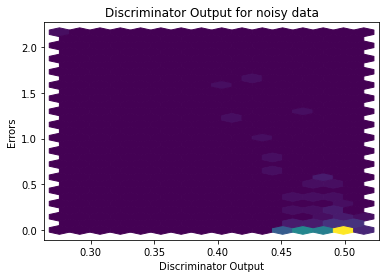

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


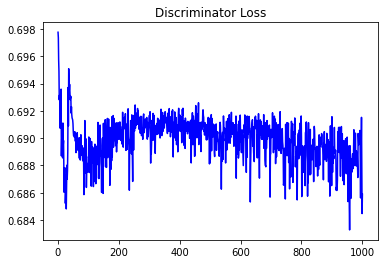

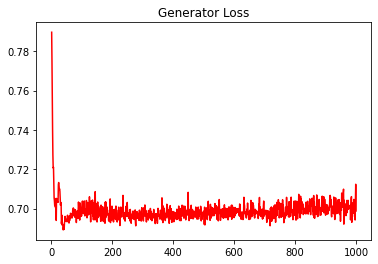

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03189251682937027


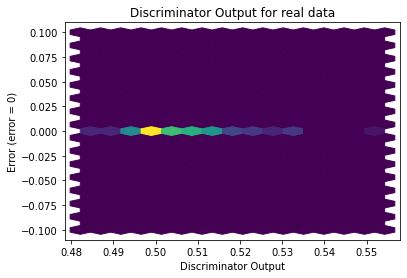

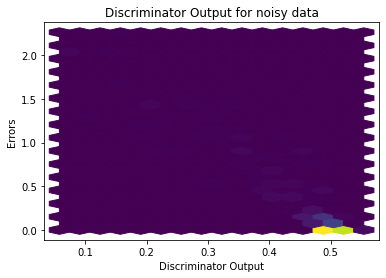

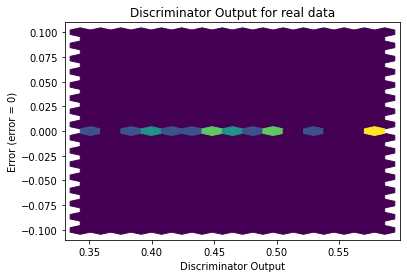

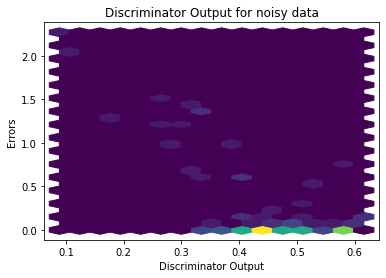

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4362]], requires_grad=True)
